In [1]:
X = [[5.9,3.2],
     [4.6,2.9],
     [4.7,3.2],
     [5.5,4.2],
     [5.0,3.0],
     [4.9,3.1],
     [6.7,3.1],
     [5.1,3.8],
     [6.0,3.0]]

In [2]:
centroids = [[6.2,3.2],
             [6.6,3.7],
             [6.5,3.0]]

In [3]:
import pandas as pd

In [4]:
df = pd.DataFrame(X, columns=['X','Y'])
cdf = pd.DataFrame(centroids, columns=['CX','CY'])

In [5]:
df

,X,Y
0,5.9,3.2
1,4.6,2.9
2,4.7,3.2
3,5.5,4.2
4,5.0,3.0
5,4.9,3.1
6,6.7,3.1
7,5.1,3.8
8,6.0,3.0


In [6]:
import matplotlib.pyplot as plt

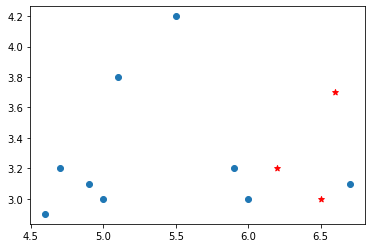

In [7]:
plt.scatter(df['X'],df['Y'])
plt.scatter(cdf['CX'],cdf['CY'], color='red', marker='*')

In [8]:
clusters={}#3 clusters, 0,1,2


In [9]:
def euc_dist(x1, x2, y1, y2):
    '''
    Returns the euclidean distance between the given points.
    '''
    return ((x2 - x1) ** 2) + ((y2 - y1) ** 2)

In [10]:
def k_means(X, centroids, clusters, k):
    '''
    Assigns each point in X to a centroid in centroids populating the clusters dictionary.
    '''
    for i in range(k):
        clusters[i] = []

    for i in range(len(X)):
        dist = []

        for j in range(k):
            dist.append(euc_dist(centroids[j][0], X[i][0], centroids[j][1], X[i][1]))

        centroid_ind = dist.index(min(dist))
        clusters[centroid_ind].append(X[i])

    return clusters

In [11]:
def new_cent(X, centroids,clusters, k=3):
    for i in range(k):
            x_sum = 0
            y_sum = 0
            for j in range(len(clusters[i])):
                x_sum += clusters[i][j][0]
                y_sum += clusters[i][j][1]
            centroids[i] = [round( (x_sum / len(clusters[i])),3) , round( (y_sum / len(clusters[i])) , 3)]

    return centroids

In [12]:
for i in range(5):
    clusters = k_means(X, centroids=centroids, clusters=clusters, k=3)
    centroids = new_cent(X, centroids=centroids, clusters=clusters, k=3)

    print(f"Centroids during iteration {i+1}: {centroids}")


Centroids during iteration 1: [[5.171, 3.171], [5.5, 4.2], [6.7, 3.1]]
Centroids during iteration 2: [[5.02, 3.08], [5.3, 4.0], [6.35, 3.05]]
Centroids during iteration 3: [[4.8, 3.05], [5.3, 4.0], [6.2, 3.1]]
Centroids during iteration 4: [[4.8, 3.05], [5.3, 4.0], [6.2, 3.1]]
Centroids during iteration 5: [[4.8, 3.05], [5.3, 4.0], [6.2, 3.1]]


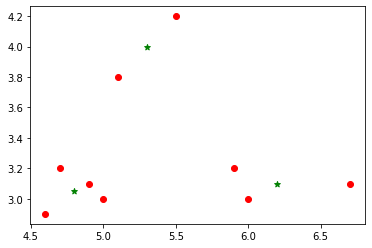

In [13]:
cdf = pd.DataFrame(centroids, columns=['CX','CY'])
plt.scatter(df['X'],df['Y'],color='red')
plt.scatter(cdf['CX'],cdf['CY'],color='green', marker='*')